In [3]:
# See env.yaml to configure your environment
import pandas as pd
import numpy as np
import matplotlib.markers
import datetime as dt
import matplotlib as plt

from sentiment_analysis_functions import *
from time_series_analysis_functions import *
from query_functions import *

from statsmodels.tsa.seasonal import seasonal_decompose
from kats.consts import TimeSeriesData

In [4]:
# Assumed to have already queried data from Twitter
df = pd.read_csv('12_2_23_59_to_12_3_23_59.csv')
print(len(df), 'Tweets Pulled')
df.head()

76174 Tweets Pulled


,author_id,referenced_tweets,public_metrics,edit_history_tweet_ids,created_at,conversation_id,in_reply_to_user_id,text,reply_settings,lang,...,attachments,geo,name,user_metrics,verified,profile_image_url,username,protected,description,location
0,912060662909689857,"[{'type': 'replied_to', 'id': '159910479979382...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599191744825872384'],2022-12-03T23:59:58.000Z,1599025992110149633,1.585925e+18,@adiss_com @WendellAlbright @barbinho9 @POTUS ...,everyone,en,...,NaN,NaN,Si,"{'followers_count': 25, 'following_count': 83,...",False,https://pbs.twimg.com/profile_images/138547941...,Siwoody2206,False,NaN,NaN
1,1551666420253073414,"[{'type': 'replied_to', 'id': '159902599211014...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599191725922476032'],2022-12-03T23:59:53.000Z,1599025992110149633,1.349149e+18,@POTUS @tyler_adams14 @USMNT BACK HOME USA,everyone,en,...,NaN,NaN,gerardo torrez,"{'followers_count': 5, 'following_count': 3, '...",False,https://pbs.twimg.com/profile_images/155166682...,gerardo12205097,False,NaN,NaN
2,809965691252117504,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599191724521271297'],2022-12-03T23:59:53.000Z,1599191724521271297,NaN,Just a reminder that Gregg Berhalter didn’t ev...,everyone,en,...,NaN,NaN,Dhan,"{'followers_count': 1274, 'following_count': 1...",False,https://pbs.twimg.com/profile_images/159667983...,Dhaneye,False,"Trying to find my way through life. Foodie , F...",United States
3,809965691252117504,"[{'type': 'replied_to', 'id': '159918825694756...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",['1599190755028762624'],2022-12-03T23:56:02.000Z,1599188256947568640,5.277261e+07,@ByDougMcIntyre Berhalter the fraud didn’t eve...,everyone,en,...,NaN,NaN,Dhan,"{'followers_count': 1274, 'following_count': 1...",False,https://pbs.twimg.com/profile_images/159667983...,Dhaneye,False,"Trying to find my way through life. Foodie , F...",United States
4,465194453,"[{'type': 'replied_to', 'id': '159890116864571...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",['1599191722994864128'],2022-12-03T23:59:52.000Z,1594511668272414720,4.651945e+08,One homage to Gyasi Zardes from Haji Wright fo...,everyone,en,...,NaN,NaN,Rohan Chatterjee,"{'followers_count': 111, 'following_count': 45...",False,https://pbs.twimg.com/profile_images/151025159...,rchatter29,False,"Philly born, Jersey raised dad and husband, us...",NaN


In [5]:
# Filter for tweets during USAvNED
USAvNED_tweets = df.loc[np.where((df.created_at > '2022-12-03T13:58:00.000Z') 
                                        & (df.created_at < '2022-12-03T18:00:00.000Z'))]
USAvNED_tweets = preprocess(USAvNED_tweets)
USAvNED_tweets.head()

,author_id,referenced_tweets,public_metrics,edit_history_tweet_ids,created_at,conversation_id,in_reply_to_user_id,text,reply_settings,lang,...,name,user_metrics,verified,profile_image_url,username,protected,description,location,filtered_text,word_count
12196,1019817647456731136,"[{'type': 'replied_to', 'id': '159908320109988...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101106269097985'],2022-12-03T17:59:48.000Z,1599083201099882497,7.563792e+06,@USMNT LIVE NOW 🔴argentina-vs-australia live\n...,everyone,en,...,FIFA World cup,"{'followers_count': 149, 'following_count': 12...",False,https://pbs.twimg.com/profile_images/159837109...,lisa37529811,False,⚽ LIVE NOW 🔴⚽ \n📲💻HD🔴►,usa,LIVE NOW argentina-vs-australia liveHD,5
12197,1019817647456731136,"[{'type': 'replied_to', 'id': '159909546398194...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101076686663680'],2022-12-03T17:59:41.000Z,1599095463981948933,7.563792e+06,@USMNT @budweiserusa @headdturnerr LIVE NOW 🔴a...,everyone,en,...,FIFA World cup,"{'followers_count': 149, 'following_count': 12...",False,https://pbs.twimg.com/profile_images/159837109...,lisa37529811,False,⚽ LIVE NOW 🔴⚽ \n📲💻HD🔴►,usa,LIVE NOW argentina-vs-australia liveHD,5
12212,425338847,"[{'type': 'replied_to', 'id': '159909124140418...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",['1599101154809376768'],2022-12-03T17:59:59.000Z,1599080674660868097,8.502062e+17,@NickZazzaro @fbaishdmd @OCPDesigns @USMNT Obv...,everyone,en,...,Stuart Dillon #COYI,"{'followers_count': 4196, 'following_count': 4...",False,https://pbs.twimg.com/profile_images/158751282...,StuartDillon1,False,"Equality. Into films, graphic novels, Dr Who, ...","West Suffolk, England",Obviously I meant the letters,6
12213,176513256,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101152531865600'],2022-12-03T17:59:59.000Z,1599101152531865600,NaN,"If I’m not mistaken, Haji Wright becomes the f...",everyone,en,...,Mind of Abram,"{'followers_count': 2455, 'following_count': 1...",False,https://pbs.twimg.com/profile_images/154769778...,MindOfAbram,False,"Father, husband, teacher, coach (probably in t...",NaN,"If Im not mistaken, Haji Wright becomes the fi...",25
12214,1683482065,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101150724165633'],2022-12-03T17:59:58.000Z,1599101150724165633,NaN,Yo @USMNT Pay these guys top dollar for the ne...,everyone,en,...,🇮🇸Kong🇮🇸,"{'followers_count': 318, 'following_count': 41...",False,https://pbs.twimg.com/profile_images/159505605...,KongTheViking,False,Big Gamer Man!,Iceland,Yo Pay these guys top dollar for the next 4 ye...,21


In [6]:
# See tweet distribution
USAvNED_tweets['word_count'].describe()

count    56147.000000
mean        14.267209
std         11.413559
min          1.000000
25%          6.000000
50%         11.000000
75%         19.000000
max         69.000000
Name: word_count, dtype: float64

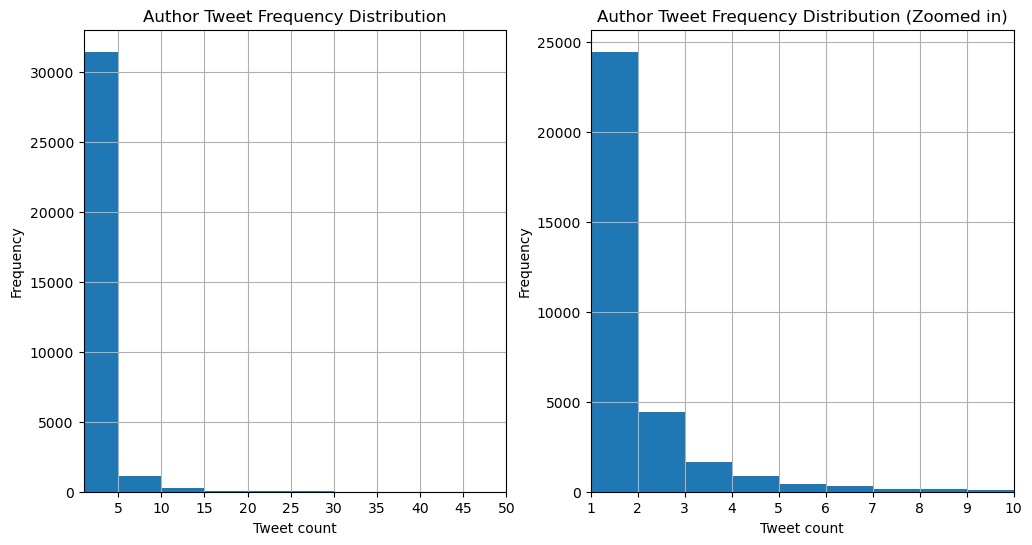

In [7]:
get_author_hist(USAvNED_tweets, 11)

In [8]:
# Run VADER algorithm to calculate and classify sentiment
USAvNED_tweets = run_vader(USAvNED_tweets)
USAvNED_tweets.head()

,author_id,referenced_tweets,public_metrics,edit_history_tweet_ids,created_at,conversation_id,in_reply_to_user_id,text,reply_settings,lang,...,sentiment_compound_polarity,sentiment_neutral,sentiment_negative,sentiment_pos,sentiment_type,sentiment_compound_polarity_f,sentiment_neutral_f,sentiment_negative_f,sentiment_pos_f,sentiment_type_f
12196,1019817647456731136,"[{'type': 'replied_to', 'id': '159908320109988...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101106269097985'],2022-12-03T17:59:48.000Z,1599083201099882497,7.563792e+06,@USMNT LIVE NOW 🔴argentina-vs-australia live\n...,everyone,en,...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.000,NEUTRAL
12197,1019817647456731136,"[{'type': 'replied_to', 'id': '159909546398194...","{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101076686663680'],2022-12-03T17:59:41.000Z,1599095463981948933,7.563792e+06,@USMNT @budweiserusa @headdturnerr LIVE NOW 🔴a...,everyone,en,...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.000,NEUTRAL
12212,425338847,"[{'type': 'replied_to', 'id': '159909124140418...","{'retweet_count': 0, 'reply_count': 1, 'like_c...",['1599101154809376768'],2022-12-03T17:59:59.000Z,1599080674660868097,8.502062e+17,@NickZazzaro @fbaishdmd @OCPDesigns @USMNT Obv...,everyone,en,...,0.0000,1.000,0.000,0.000,NEUTRAL,0.0000,1.000,0.000,0.000,NEUTRAL
12213,176513256,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101152531865600'],2022-12-03T17:59:59.000Z,1599101152531865600,NaN,"If I’m not mistaken, Haji Wright becomes the f...",everyone,en,...,0.2755,0.919,0.000,0.081,POSITIVE,0.2755,0.916,0.000,0.084,POSITIVE
12214,1683482065,NaN,"{'retweet_count': 0, 'reply_count': 0, 'like_c...",['1599101150724165633'],2022-12-03T17:59:58.000Z,1599101150724165633,NaN,Yo @USMNT Pay these guys top dollar for the ne...,everyone,en,...,-0.1260,0.632,0.193,0.175,NEGATIVE,-0.1260,0.603,0.209,0.189,NEGATIVE


In [9]:
# Find effects of VADER performance on processed text
mismatches(USAvNED_tweets)

,raw,filtered,filtered_change
POSITIVE,698,588,-110
NEGATIVE,436,787,351
NEUTRAL,371,130,-241


In [10]:
# Find average magnitude of effects from processed text
(USAvNED_tweets['sentiment_compound_polarity_f'] - USAvNED_tweets['sentiment_compound_polarity']).abs().mean()

0.025507674497301725

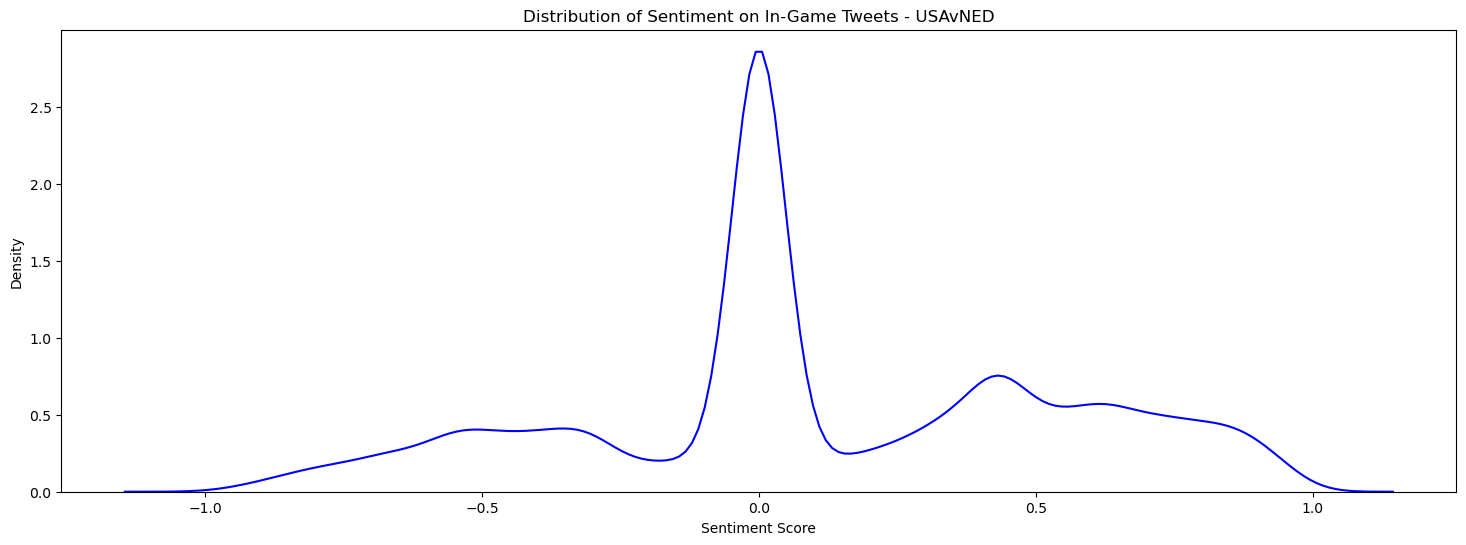

c:\Users\willc\anaconda3\envs\kats_test\lib\site-packages\scipy\stats\morestats.py:1760: UserWarning:

p-value may not be accurate for N > 5000.



ShapiroResult(statistic=0.9574552178382874, pvalue=0.0)

In [11]:
# See distribution of tweet sentiment
get_dist(USAvNED_tweets['sentiment_compound_polarity_f'], 'USAvNED')

In [12]:
# See distribution by classification type
USAvNED_tweets[['sentiment_type_f', 'sentiment_compound_polarity_f']].groupby('sentiment_type_f').describe()

sentiment_compound_polarity_f                              \
                                         count      mean       std     min   
sentiment_type_f                                                             
NEGATIVE                               13724.0 -0.446848  0.217684 -0.9996   
NEUTRAL                                18623.0  0.000000  0.000000  0.0000   
POSITIVE                               23800.0  0.526718  0.230242  0.0018   

                                                  
                     25%     50%     75%     max  
sentiment_type_f                                  
NEGATIVE         -0.5984 -0.4404 -0.2960 -0.0008  
NEUTRAL           0.0000  0.0000  0.0000  0.0000  
POSITIVE          0.3612  0.5106  0.7096  0.9994

In [13]:
# Get extremely positive & extremely negative sentiment tweets for word cloud
extreme_positive = USAvNED_tweets[USAvNED_tweets['sentiment_compound_polarity_f']
                            >=np.percentile(USAvNED_tweets['sentiment_compound_polarity_f'], 95)]
extreme_negative = USAvNED_tweets[USAvNED_tweets['sentiment_compound_polarity_f']
                            <=np.percentile(USAvNED_tweets['sentiment_compound_polarity_f'], 5)]

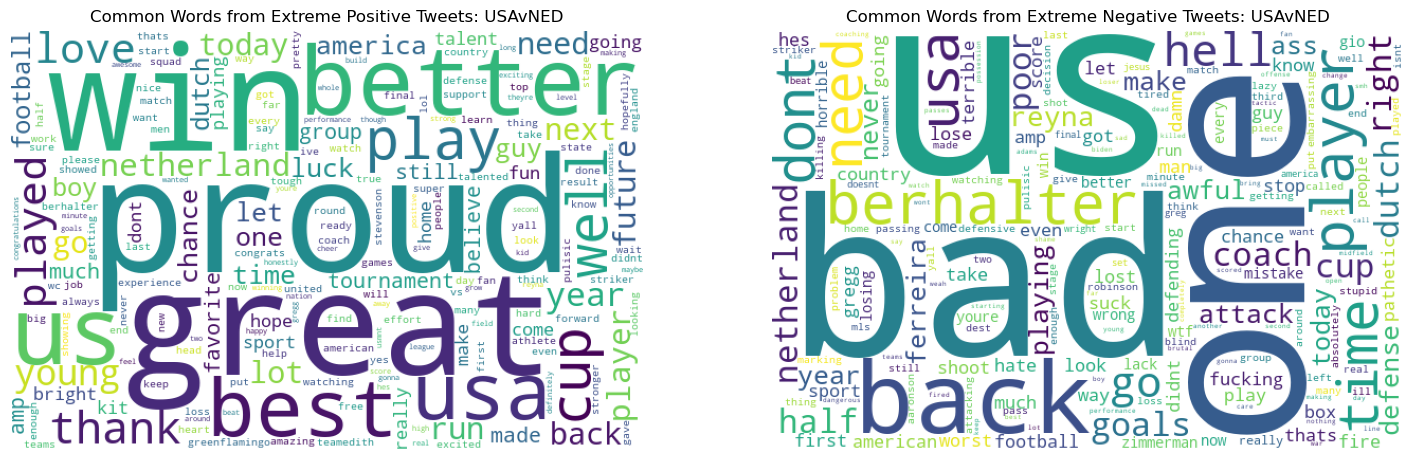

In [14]:
# Render viz of extremely positive & extremely negative sentiment tweets
create_word_cloud(extreme_positive['filtered_text'], extreme_negative['filtered_text'], 'USAvNED', True, 
                    ['team', 'goal', 'world', 'game', 'good', 'fuck', 'shit', 'u', 
                    'ball', 'soccer', 'cant', 'im', 'see', 'v'])

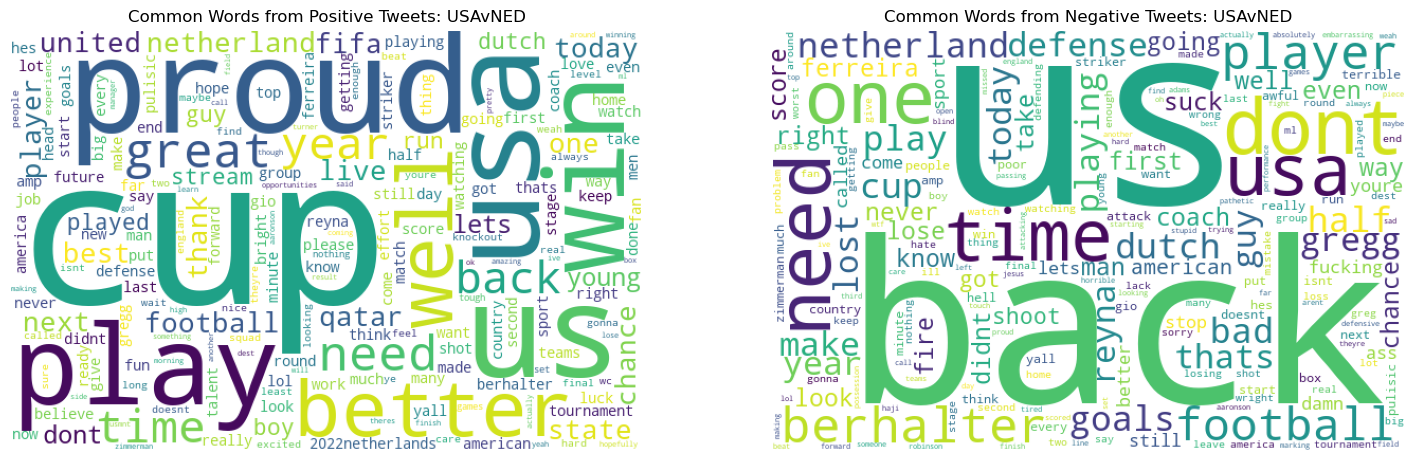

In [15]:
# Render viz for all positive and negative tweets
positive = USAvNED_tweets[USAvNED_tweets['sentiment_compound_polarity_f']>0]
negative = USAvNED_tweets[USAvNED_tweets['sentiment_compound_polarity_f']<0]

create_word_cloud(positive['filtered_text'], negative['filtered_text'], 'USAvNED', False, 
                    ['team', 'goal', 'world', 'game', 'good', 'fuck', 'shit', 'u', 
                    'ball', 'soccer', 'cant', 'im', 'see', 'v', 'let', 'go', 'vs'])

In [16]:
# Split the string of tweet to remove the seconds, convert to a datetime column
USAvNED_tweets.created_at = pd.to_datetime(USAvNED_tweets.created_at).dt.strftime('%Y-%m-%d %H:%M')

# Get tweet counts by minute
tweets_m = USAvNED_tweets.groupby('created_at').count()['id']

# Ensure the created_at field is still a datetime after grouping calculations
tweets_m.index = pd.DatetimeIndex(tweets_m.index)

# See distribution
tweets_m.describe()

count     242.000000
mean      232.012397
std       200.828192
min        64.000000
25%       119.000000
50%       164.000000
75%       263.750000
max      1278.000000
Name: id, dtype: float64

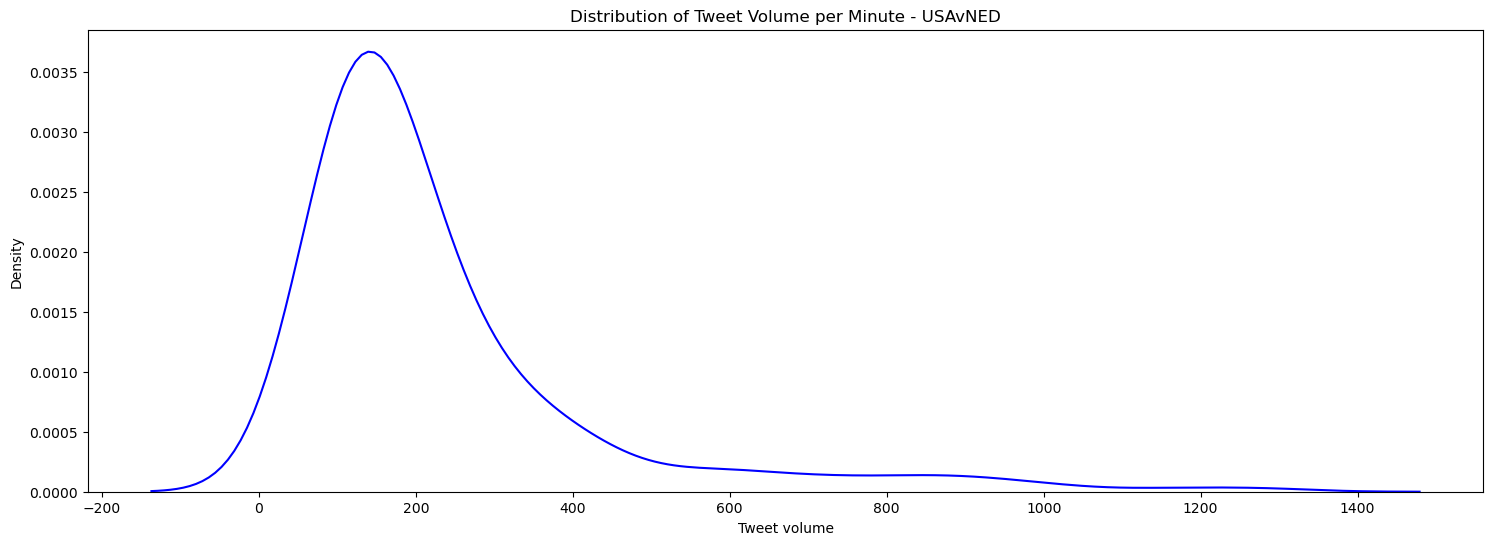

ShapiroResult(statistic=0.6858609914779663, pvalue=5.6007264326003944e-21)

In [17]:
# See distribution of tweets per minute
get_dist_vol(tweets_m, 'USAvNED')

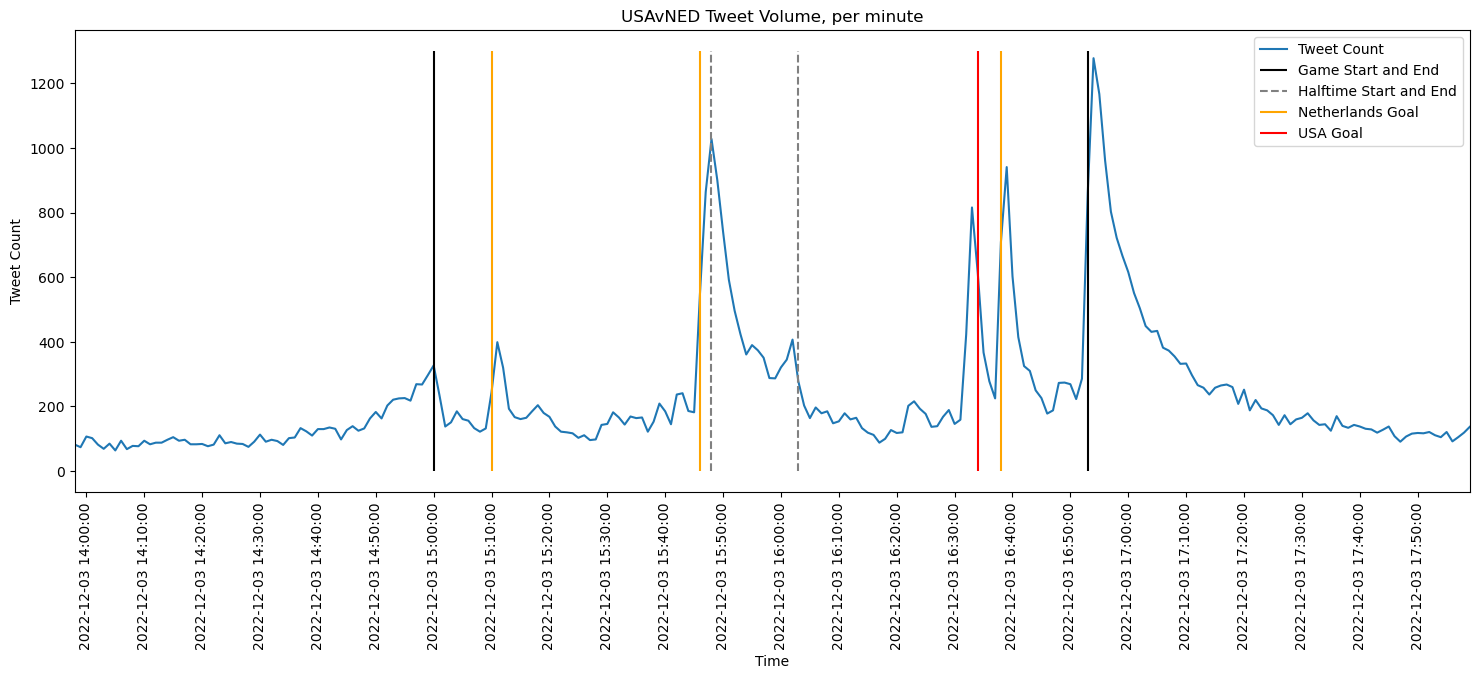

In [18]:
# Generate time series chart of tweet volume
fig, ax = plt.subplots(figsize = (18, 6))

# Set line chart, axes ticks per 10 minutes
tweets_m.plot.line(ax = ax, y='id', title='USAvNED Tweet Volume, per minute', label='Tweet Count')
ax.set_xticks(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'), rotation = 90)

# Plot black lines for the game start and end, orange lines for Dutch goals, and red lines for American goals
ax.set_xlabel('Time')
ax.set_ylabel('Tweet Count')
ax.vlines(x = ['2022-12-03 15:00:00', '2022-12-03 16:53:00'], ymin = 0, ymax = 1300, color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-12-03 15:48:00', '2022-12-03 16:03:00'], ymin = 0, ymax = 1300, color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-12-03 15:10:00', '2022-12-03 15:46:00', '2022-12-03 16:38:00'], ymin = 0, ymax = 1300, color = 'orange', label = 'Netherlands Goal')
ax.vlines(x = '2022-12-03 16:34:00', ymin = 0, ymax = 1300, color = 'red', label = 'USA Goal')
ax.legend();

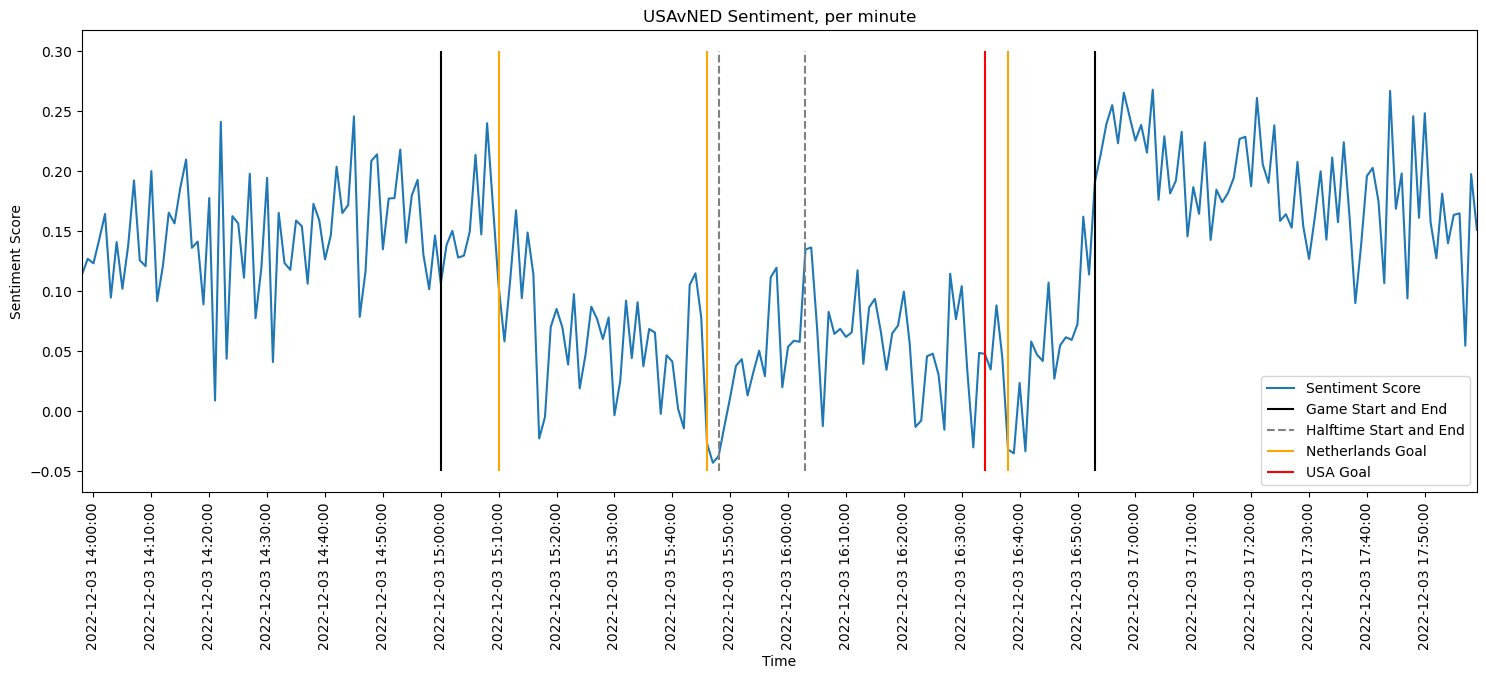

In [19]:
# Replicate time series chart for sentiment
fig, ax = plt.subplots(figsize = (18, 6))

USAvNED_tweets_m = USAvNED_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'})
USAvNED_tweets_m.index = pd.DatetimeIndex(USAvNED_tweets_m.index)
USAvNED_tweets_m.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                            title='USAvNED Sentiment, per minute', label='Sentiment Score')

# Set axes
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'), 
                    rotation = 90)


# Plot black lines for the game start and end, dotted lines for halftime, orange lines for Dutch goals, red lines for American goals
ax.vlines(x = ['2022-12-03 15:00:00', '2022-12-03 16:53:00'], ymin = -0.05, ymax = .3, 
                color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-12-03 15:48:00', '2022-12-03 16:03:00'], ymin = -0.05, ymax = .3, 
                color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-12-03 15:10:00', '2022-12-03 15:46:00', '2022-12-03 16:38:00'], ymin = -0.05, ymax = .3, 
                color = 'orange', label = 'Netherlands Goal')
ax.vlines(x = '2022-12-03 16:34:00', ymin = -0.05, ymax = .3, 
                color = 'red', label = 'USA Goal')
ax.legend();

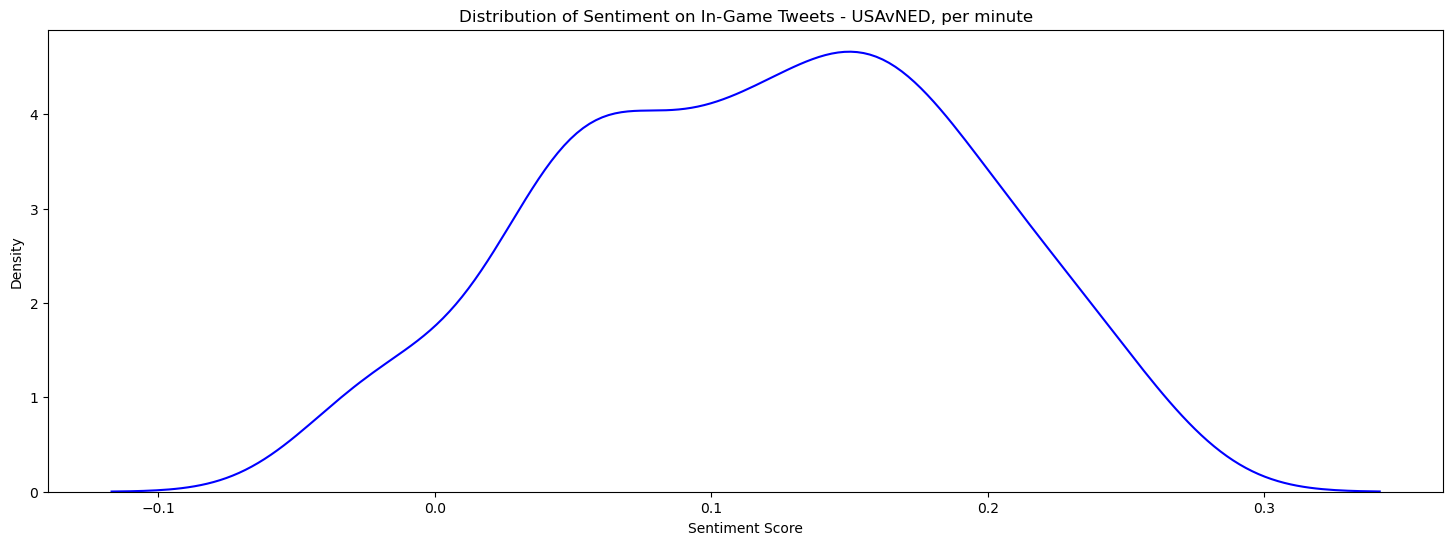

ShapiroResult(statistic=0.9841495752334595, pvalue=0.00850679725408554)

In [20]:
# See distribution of tweet sentiment by minute
get_dist(USAvNED_tweets_m['sentiment_compound_polarity_f'], 'USAvNED, per minute')

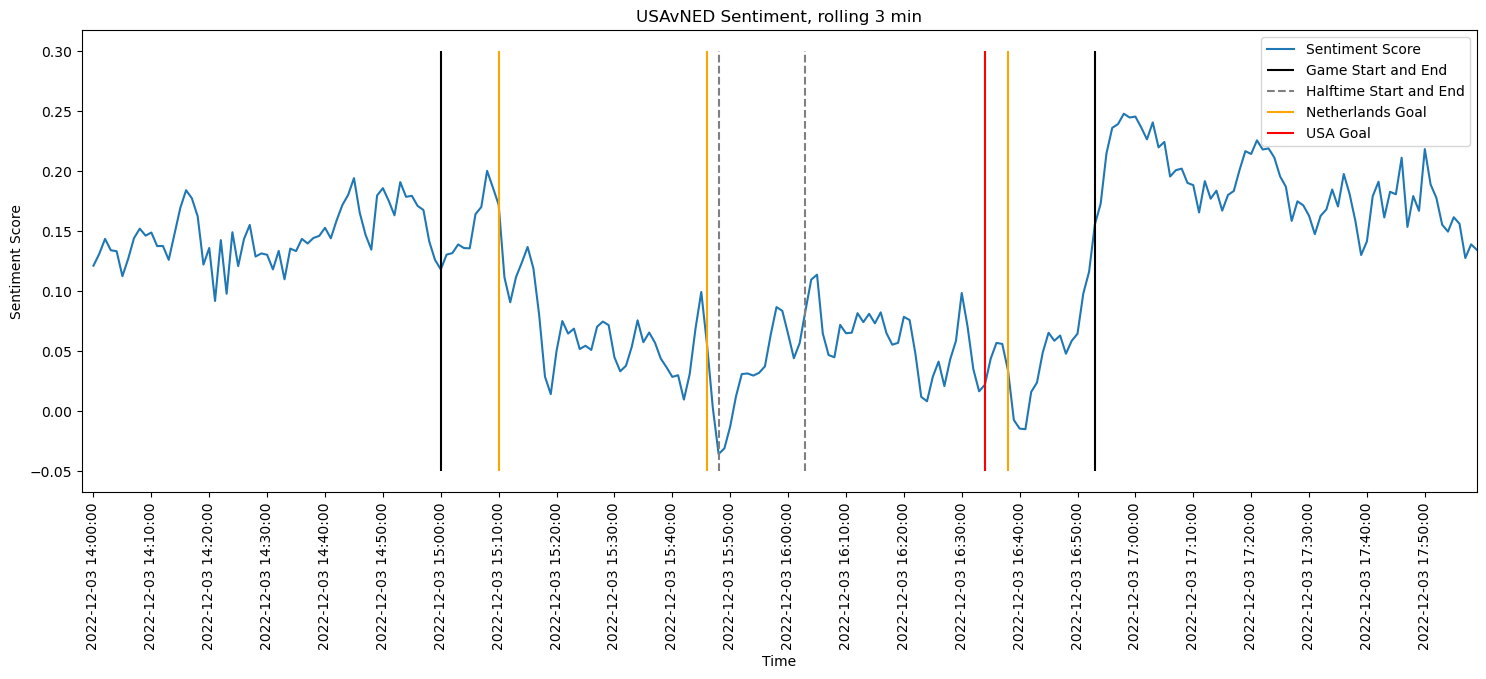

In [21]:
# Replicate visual for 3 minute rolling average
fig, ax = plt.subplots(figsize = (18, 6))

# Calculate the 3 minute rolling average of sentiment score
USAvNED_tweets_rolling_f = USAvNED_tweets.groupby('created_at').agg({'sentiment_compound_polarity_f': 'mean'}).rolling(3).mean()

# Ensure the created_at field is still a datetime after grouping calculations
USAvNED_tweets_rolling_f.index = pd.DatetimeIndex(USAvNED_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvNED_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                title='USAvNED Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'), 
                    rotation = 90)

# Plot black lines for the game start and end, dotted lines for halftime, orange lines for Dutch goals, red lines for American goals
ax.vlines(x = ['2022-12-03 15:00:00', '2022-12-03 16:53:00'], ymin = -0.05, ymax = .3, 
            color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-12-03 15:48:00', '2022-12-03 16:03:00'], ymin = -0.05, ymax = .3, 
            color = 'gray', linestyle = 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-12-03 15:10:00', '2022-12-03 15:46:00', '2022-12-03 16:38:00'], ymin = -0.05, ymax = .3, 
            color = 'orange', label = 'Netherlands Goal')
ax.vlines(x = '2022-12-03 16:34:00', ymin = -0.05, ymax = .3, 
            color = 'red', label = 'USA Goal')
ax.legend();

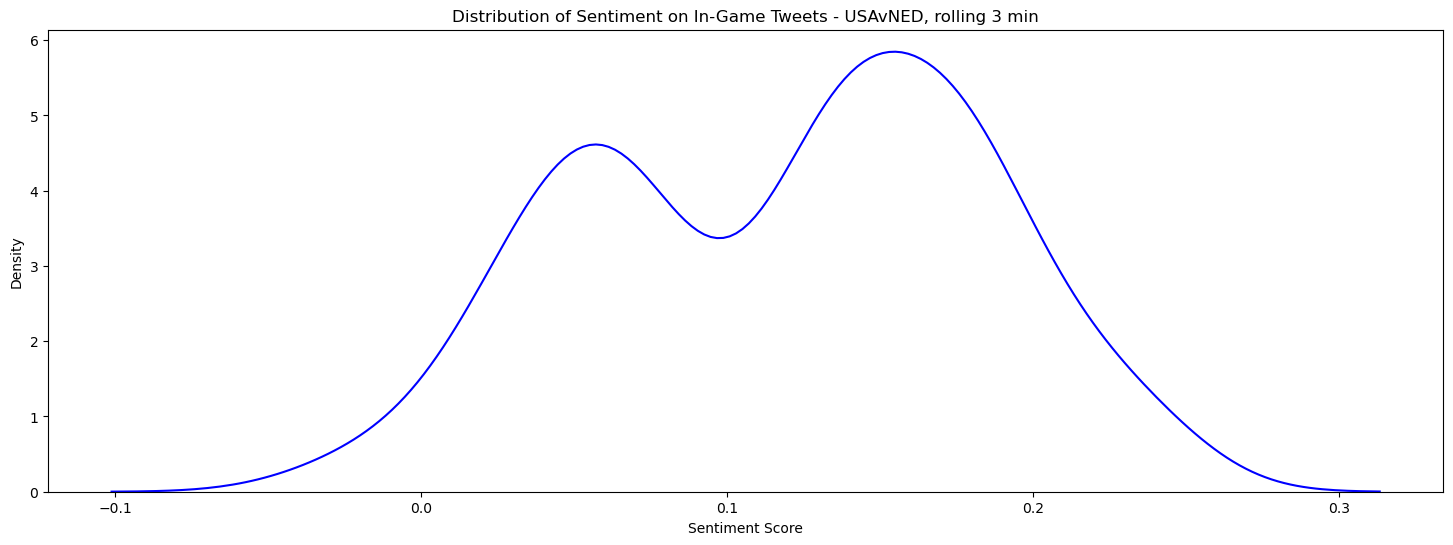

ShapiroResult(statistic=0.9707503318786621, pvalue=7.499451021431014e-05)

In [22]:
# See distribution of sentiment for rolling 3 minute average
get_dist(USAvNED_tweets_rolling_f['sentiment_compound_polarity_f'][2:], 'USAvNED, rolling 3 min')

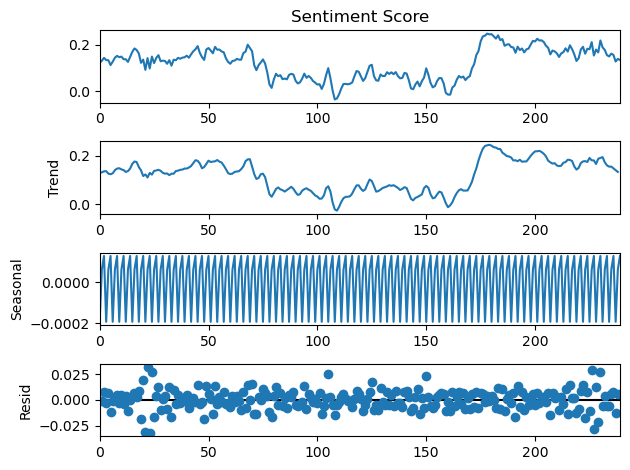

In [23]:
# Analyze time series
# Remove NAs, reset index
ts = USAvNED_tweets_rolling_f['sentiment_compound_polarity_f'][2:]

ts = ts.reset_index(drop=False)

ts.head()

# Additive Model (multiplicative not appropriate)
additive = seasonal_decompose(ts['sentiment_compound_polarity_f'].rename('Sentiment Score'), 
                            model='additive', period=3)
# Plot
additive.plot();

In [24]:
# Create TimeSeriesData object to feed into kats
USAvNED_tweets_rolling = USAvNED_tweets_rolling_f[2:]

data = pd.DataFrame({'time': USAvNED_tweets_rolling.index, 
                    'raw': USAvNED_tweets_rolling['sentiment_compound_polarity_f']})
                    
ts = TimeSeriesData(data)
ts

,time,raw
0,2022-12-03 14:00:00,0.121174
1,2022-12-03 14:01:00,0.131060
2,2022-12-03 14:02:00,0.143522
3,2022-12-03 14:03:00,0.134007
4,2022-12-03 14:04:00,0.133226
...,...,...
235,2022-12-03 17:55:00,0.161559
236,2022-12-03 17:56:00,0.156065
237,2022-12-03 17:57:00,0.127589
238,2022-12-03 17:58:00,0.138942


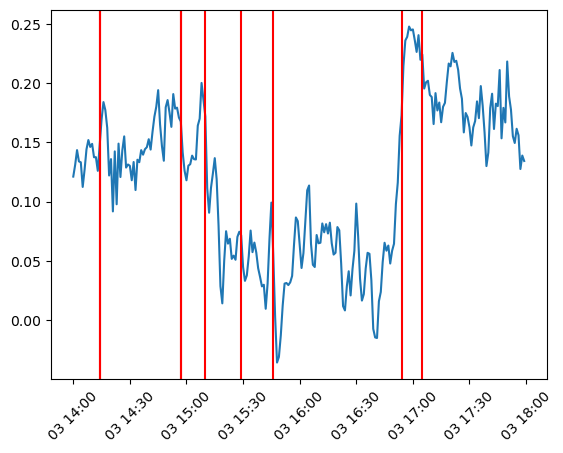

[CUSUMChangePoint(start_time: 2022-12-03 14:14:00, end_time: 2022-12-03 14:14:00, confidence: 0.9966642938641523, direction: increase, index: 9, delta: 0.03875165065757655, regression_detected: True, stable_changepoint: True, mu0: 0.1379430588125675, mu1: 0.17669470947014404, llr: 11.406141774280712, llr_int: 11.313454337171306, p_value: 0.0033357061358476603, p_value_int: 0.003493933260641513),
 CUSUMChangePoint(start_time: 2022-12-03 14:14:00, end_time: 2022-12-03 14:14:00, confidence: 0.9998837581956188, direction: increase, index: 8, delta: 0.03611651634804938, regression_detected: True, stable_changepoint: True, mu0: 0.14077547523528622, mu1: 0.1768919915833356, llr: 18.119676031857338, llr_int: 12.002415654858009, p_value: 0.0001162418043811897, p_value_int: 0.002475760079130196),
 CUSUMChangePoint(start_time: 2022-12-03 14:57:00, end_time: 2022-12-03 14:57:00, confidence: 0.9999899408976205, direction: decrease, index: 8, delta: -0.048271666133914454, regression_detected: True, 

In [25]:
# Run Kats for changepoint detection
change_detect(ts, 6, 6, 1, 0.0035)

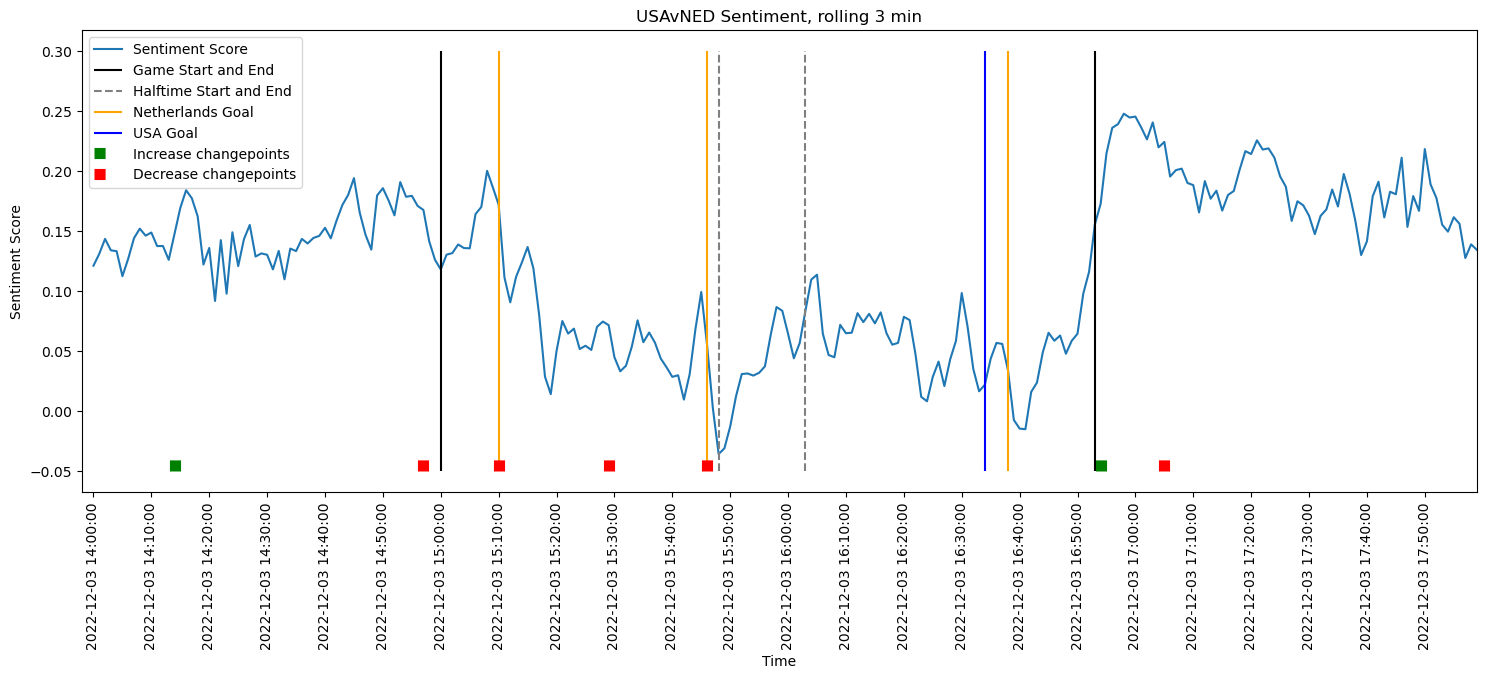

In [26]:
# Add change points to graph
fig, ax = plt.subplots(figsize = (18, 6))

# Ensure the created_at field is still a datetime after grouping calculations
USAvNED_tweets_rolling_f.index = pd.DatetimeIndex(USAvNED_tweets_rolling_f.index)

# Plot the line chart with ticks every 10 minutes, set axes
USAvNED_tweets_rolling_f.plot.line(ax = ax, y='sentiment_compound_polarity_f', 
                                    title='USAvNED Sentiment, rolling 3 min', label='Sentiment Score')
ax.set_xlabel('Time')
ax.set_ylabel('Sentiment Score')
ax.set_xticks(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'))
ax.set_xticklabels(pd.date_range(start='2022-12-03 14:00', end ='2022-12-03 17:59', freq='10min'), 
                    rotation = 90)

# Plot black lines for the game start and end, dotted lines for halftime, orange lines for Dutch goals, red lines for American goals
ax.vlines(x = ['2022-12-03 15:00:00', '2022-12-03 16:53:00'], ymin = -0.05, ymax = .3, 
            color = 'black', label = 'Game Start and End')
ax.vlines(x = ['2022-12-03 15:48:00', '2022-12-03 16:03:00'], ymin = -0.05, ymax = .3, 
            color = 'gray', linestyle= 'dashed', label = 'Halftime Start and End')
ax.vlines(x = ['2022-12-03 15:10:00', '2022-12-03 15:46:00', '2022-12-03 16:38:00'], ymin = -0.05, ymax = .3, 
            color = 'orange', label = 'Netherlands Goal')
ax.vlines(x = '2022-12-03 16:34:00', ymin = -0.05, ymax = .3, 
            color = 'blue', label = 'USA Goal')
ax.vlines(x = ['2022-12-03 14:14:00', '2022-12-03 16:54:00'], ymin = -0.05, ymax = -0.04, 
            color = 'green', linestyles = 'dotted', linewidth = 8, label = 'Increase changepoints')
ax.vlines(x = ['2022-12-03 14:57:00', '2022-12-03 15:10:00', '2022-12-03 15:29:00', '2022-12-03 15:46:00', '2022-12-03 17:05:00'], ymin = -0.05, ymax = -0.04, 
            color = 'red', linestyles = 'dotted', linewidth = 8, label = 'Decrease changepoints')

ax.legend();